# **Session 21: Simple RNN for text classification**


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia

The bulk of this code is developed by Francois Chollet, Deep Learning with Python. https://github.com/fchollet/deep-learning-with-python-notebooks  The code is modified by me for Applied AI class - Behnam Kia

In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(64, return_sequences=True))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 64)          6208      
Total params: 326,208
Trainable params: 326,208
Non-trainable params: 0
_________________________________________________________________


In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.6398 - acc: 0.6153 - val_loss: 0.4969 - val_acc: 0.7822
Epoch 2/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.4230 - acc: 0.8175 - val_loss: 0.3838 - val_acc: 0.8426
Epoch 3/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.3197 - acc: 0.8724 - val_loss: 0.3955 - val_acc: 0.8242
Epoch 4/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.2399 - acc: 0.9074 - val_loss: 0.3679 - val_acc: 0.8410
Epoch 5/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1756 - acc: 0.9360 - val_loss: 0.3830 - val_acc: 0.8618
Epoch 6/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1234 - acc: 0.9569 - val_loss: 0.4091 - val_acc: 0.8424
Epoch 7/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.0822 - acc: 0.9735 - val_loss: 0.6698 - val_acc:

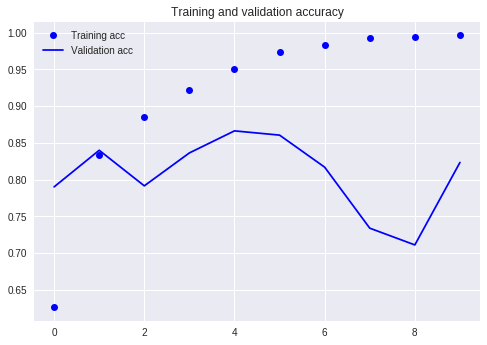

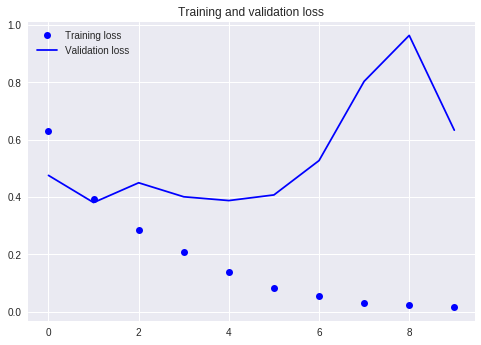

In [0]:


import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



In [0]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
dense_4 (Dense)              (None, None, 1)           33        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.5049 - acc: 0.7640 - val_loss: 0.3559 - val_acc: 0.8592
Epoch 2/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.2889 - acc: 0.8863 - val_loss: 0.3598 - val_acc: 0.8418
Epoch 3/10
20000/20000 [==============================] - 92s 5ms/step - loss: 0.2301 - acc: 0.9116 - val_loss: 0.3382 - val_acc: 0.8778
Epoch 4/10
20000/20000 [==============================] - 91s 5ms/step - loss: 0.1966 - acc: 0.9271 - val_loss: 0.5046 - val_acc: 0.8396
Epoch 5/10
20000/20000 [==============================] - 91s 5ms/step - loss: 0.1743 - acc: 0.9375 - val_loss: 0.2873 - val_acc: 0.8842
Epoch 6/10
20000/20000 [==============================] - 91s 5ms/step - loss: 0.1524 - acc: 0.9448 - val_loss: 0.4846 - val_acc: 0.8170
Epoch 7/10
20000/20000 [==============================] - 91s 5ms/step - loss: 0.1434 - acc: 0.9488 - val_loss: 0.3567 - val_acc:

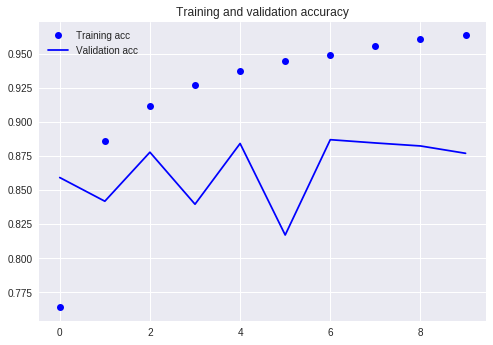

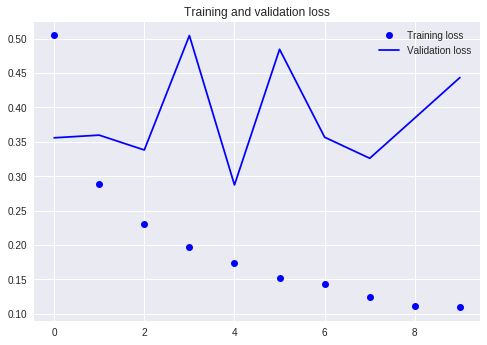

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()